<a href="https://colab.research.google.com/github/inesschwartz/pml_final_project/blob/main/PML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PML FINAL PROJECT#

**Goal**: develop a machine learning model capable of accurately classifying music tracks into different genres using the GTZAN dataset

**Data description**: GTZAN dataset; consists of 1000 audio tracks categorized into 10 genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock. Each genre contains 100 tracks with a duration of 30 seconds

# Introduction#

The objective of this project is to develop a machine learning model capable of accurately classifying music tracks into different genres using the GTZAN dataset.

Genre classification is a fundamental problem in the field of music information retrieval and has significant applications in music recommendation systems, music library organization, and streaming services. Accurate genre classification can enhance user experience by enabling personalized music recommendations and efficient music discovery. Lastly, being able to categorize individual characteristics of a dataset (ei. music tracks) into a greater theme (genre, in this case) is a very relevant and useful application of machine learning.

### About the dataset ###
The GTZAN dataset is a publicly available dataset consisting of 1000 audio tracks categorized into 10 genres: blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, and rock. Each genre contains 100 tracks, each with a duration of 30 seconds. This dataset was chosen because it provides a standard benchmark for music genre classification and because it presents a variety of challenges around audio and machine learning which we did not get a chance to work with too much during the class.

### Methods ###

The methodology of this project begins with pre-processing the data, which includes converting audio files into a consistent format and sample rate, and extracting audio features.
For model selection, we tried a few different approaches and ultimately used a Decision Tree Classification to classify genres csv files made by the tracks.

The dataset will be split into training, validation, and test sets. We will perform hyperparameter tuning using cross-validation on the training set to optimize model performance.

To evaluate the results, we will employ several performance metrics: accuracy, precision, recall, F1-score, and a confusion matrix. Accuracy will measure the proportion of correctly classified instances, while precision and recall will help understand the model's performance in predicting each genre accurately. The F1-score will ideally balance both metrics. The confusion matrix will visualize the classification results and identify misclassifications. Cross-validation will ensure the robustness of the model and its ability to generalize to new data.


Ultimately, this project aims to provide insights into the effectiveness of machine learning approaches for genre classification and demonstrate the practicality of such applications.



## Data Description ##
### The dataset includes:###

- 1000 audio tracks in .wav format.
- Each track is 30 seconds long.
- 10 genres, each containing 100 tracks.

### Data Preprocessing ###
Data preprocessing involved several steps:

- Downloading the Data: The dataset was downloaded and extracted.
- Conversion and Feature Extraction: Audio files were converted into a consistent format and sample rate. Essential features such as Mel-frequency cepstral coefficients (MFCCs), chroma features, and spectral contrast were extracted from each audio file.
- Data Cleaning: Ensuring there were no missing or corrupted files and normalizing the feature values.


### Feature Selection and Engineering ###
Important features for classification were identified and extracted from the audio signals. These included:

- MFCCs
- Chroma features
- Spectral contrast
- Zero crossing rate
- Tempo

These features were then compiled into a structured dataset suitable for machine learning algorithms.

### Data-Preprocessing###

**Note: The dataset already contains image and csv files. For the purpose of practicing data pre-processing we will later transform and extract the .wav files into .csv files ourselves.**




```
# This is formatted as code
```

## Part 1: Dowloading the data ##


In [14]:
!pip install pydub
! pip install -q kaggle

In [15]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


from pathlib import Path
from pydub import AudioSegment

import librosa

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate


The data are from the following link: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

To dowload the data:

Import your Kaggle API to your drive

Then follow the next steps:


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_to_my_kaggle_api= "/content/drive/MyDrive/kaggle.json"

In [3]:
! mkdir /content/.kaggle
!cp /content/drive/MyDrive/kaggle.json /content/.kaggle
! chmod 600 /content/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/content/.kaggle/kaggle.json': No such file or directory


In [4]:
 ! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**DOWNLOAD THE DATASET FROM KAGGLE**



In [5]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.20G/1.21G [00:14<00:00, 105MB/s]
100% 1.21G/1.21G [00:14<00:00, 90.7MB/s]


Unzip the data


In [6]:
!unzip gtzan-dataset-music-genre-classification.zip -d /content/gtzan-dataset-music-genre-classification/


Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: /content/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00002.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00003.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00004.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00005.wav  
  inflating: /content/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00006.wav  
  inflatin

## Exploratory Data Analysis ##

Purpose: Understand the data we are working with. It is possible that your data is not ready to be used? Here we will for data  errors, inconsistencies and formats.

The results will alow us to understand the necessary data cleaning and transformation steps to prepare our data.

In [7]:
import pandas as pd

df1 = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
df2 = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')


In [ ]:
#check overall summary statistics
print("Summary Statistics for features_30_sec.csv:")
print(df1.describe())
print("\nSummary Statistics for features_3_sec.csv:")
print(df2.describe())


Summary Statistics for features_30_sec.csv:
              length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  1000.000000             1000.000000           1.000000e+03   
mean      0.003051             2201.780898           4.696916e+05   
std       0.003634              715.960600           4.008995e+05   
min       0.000004             

In [ ]:
#check for missing values
print("Missing Values for features_30_sec.csv:")
print(df1.isnull().sum())
print("\nMissing Values for features_3_sec.csv:")
print(df2.isnull().sum())



Missing Values for features_30_sec.csv:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfc

In [ ]:
#check for duplicates
print("Duplicate Rows in features_30_sec.csv:")
print(df1[df1.duplicated()])
print("\nDuplicate Rows in features_3_sec.csv:")
print(df2[df2.duplicated()])



Duplicate Rows in features_30_sec.csv:
Empty DataFrame
Columns: [filename, length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, mfcc9_mean, mfcc9_var, mfcc10_mean, mfcc10_var, mfcc11_mean, mfcc11_var, mfcc12_mean, mfcc12_var, mfcc13_mean, mfcc13_var, mfcc14_mean, mfcc14_var, mfcc15_mean, mfcc15_var, mfcc16_mean, mfcc16_var, mfcc17_mean, mfcc17_var, mfcc18_mean, mfcc18_var, mfcc19_mean, mfcc19_var, mfcc20_mean, mfcc20_var, label]
Index: []

[0 rows x 60 columns]

Duplicate Rows in features_3_sec.csv:
Empty DataFrame
Columns: [filename, length, chroma_stft_mean, chrom

In [ ]:
# Check data types of each column
print("Data Types in features_30_sec.csv:")
print(df1.dtypes)
print("\nData Types in features_3_sec.csv:")
print(df2.dtypes)


Data Types in features_30_sec.csv:
filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean          

In [ ]:
print("Unique Values in features_30_sec.csv:")
for col in df1.columns:
    print(f"{col}: {df1[col].nunique()} unique values")

print("\nUnique Values in features_3_sec.csv:")
for col in df2.columns:
    print(f"{col}: {df2[col].nunique()} unique values")



Unique Values in features_30_sec.csv:
filename: 1000 unique values
length: 35 unique values
chroma_stft_mean: 986 unique values
chroma_stft_var: 986 unique values
rms_mean: 986 unique values
rms_var: 986 unique values
spectral_centroid_mean: 986 unique values
spectral_centroid_var: 986 unique values
spectral_bandwidth_mean: 986 unique values
spectral_bandwidth_var: 986 unique values
rolloff_mean: 986 unique values
rolloff_var: 986 unique values
zero_crossing_rate_mean: 984 unique values
zero_crossing_rate_var: 986 unique values
harmony_mean: 986 unique values
harmony_var: 986 unique values
perceptr_mean: 986 unique values
perceptr_var: 986 unique values
tempo: 35 unique values
mfcc1_mean: 986 unique values
mfcc1_var: 986 unique values
mfcc2_mean: 986 unique values
mfcc2_var: 986 unique values
mfcc3_mean: 986 unique values
mfcc3_var: 986 unique values
mfcc4_mean: 986 unique values
mfcc4_var: 986 unique values
mfcc5_mean: 986 unique values
mfcc5_var: 986 unique values
mfcc6_mean: 986 uni

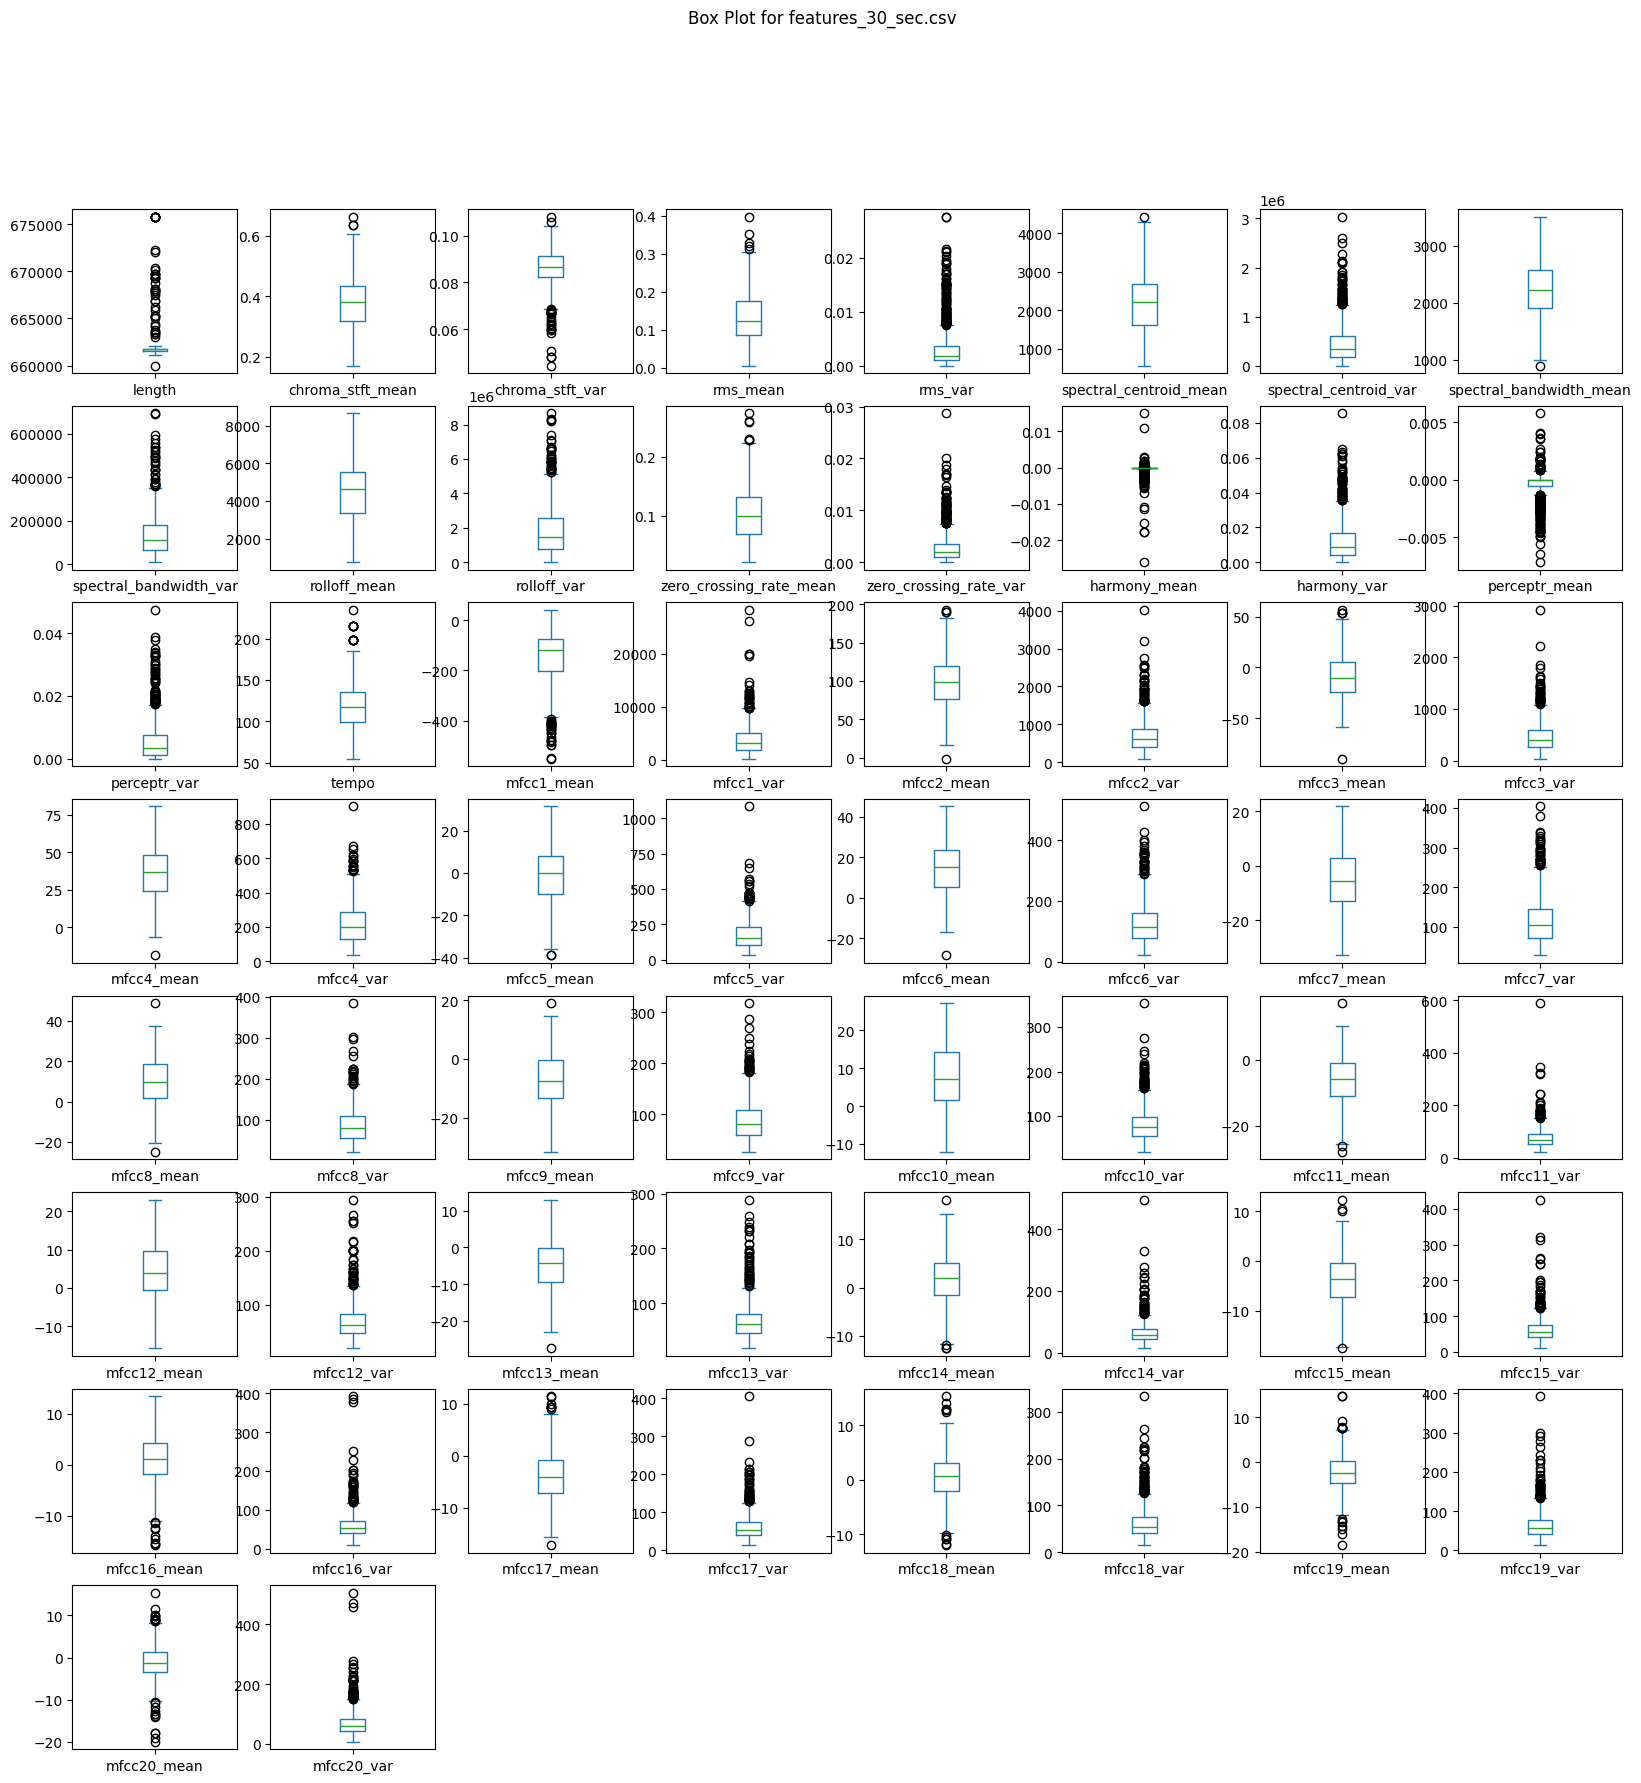

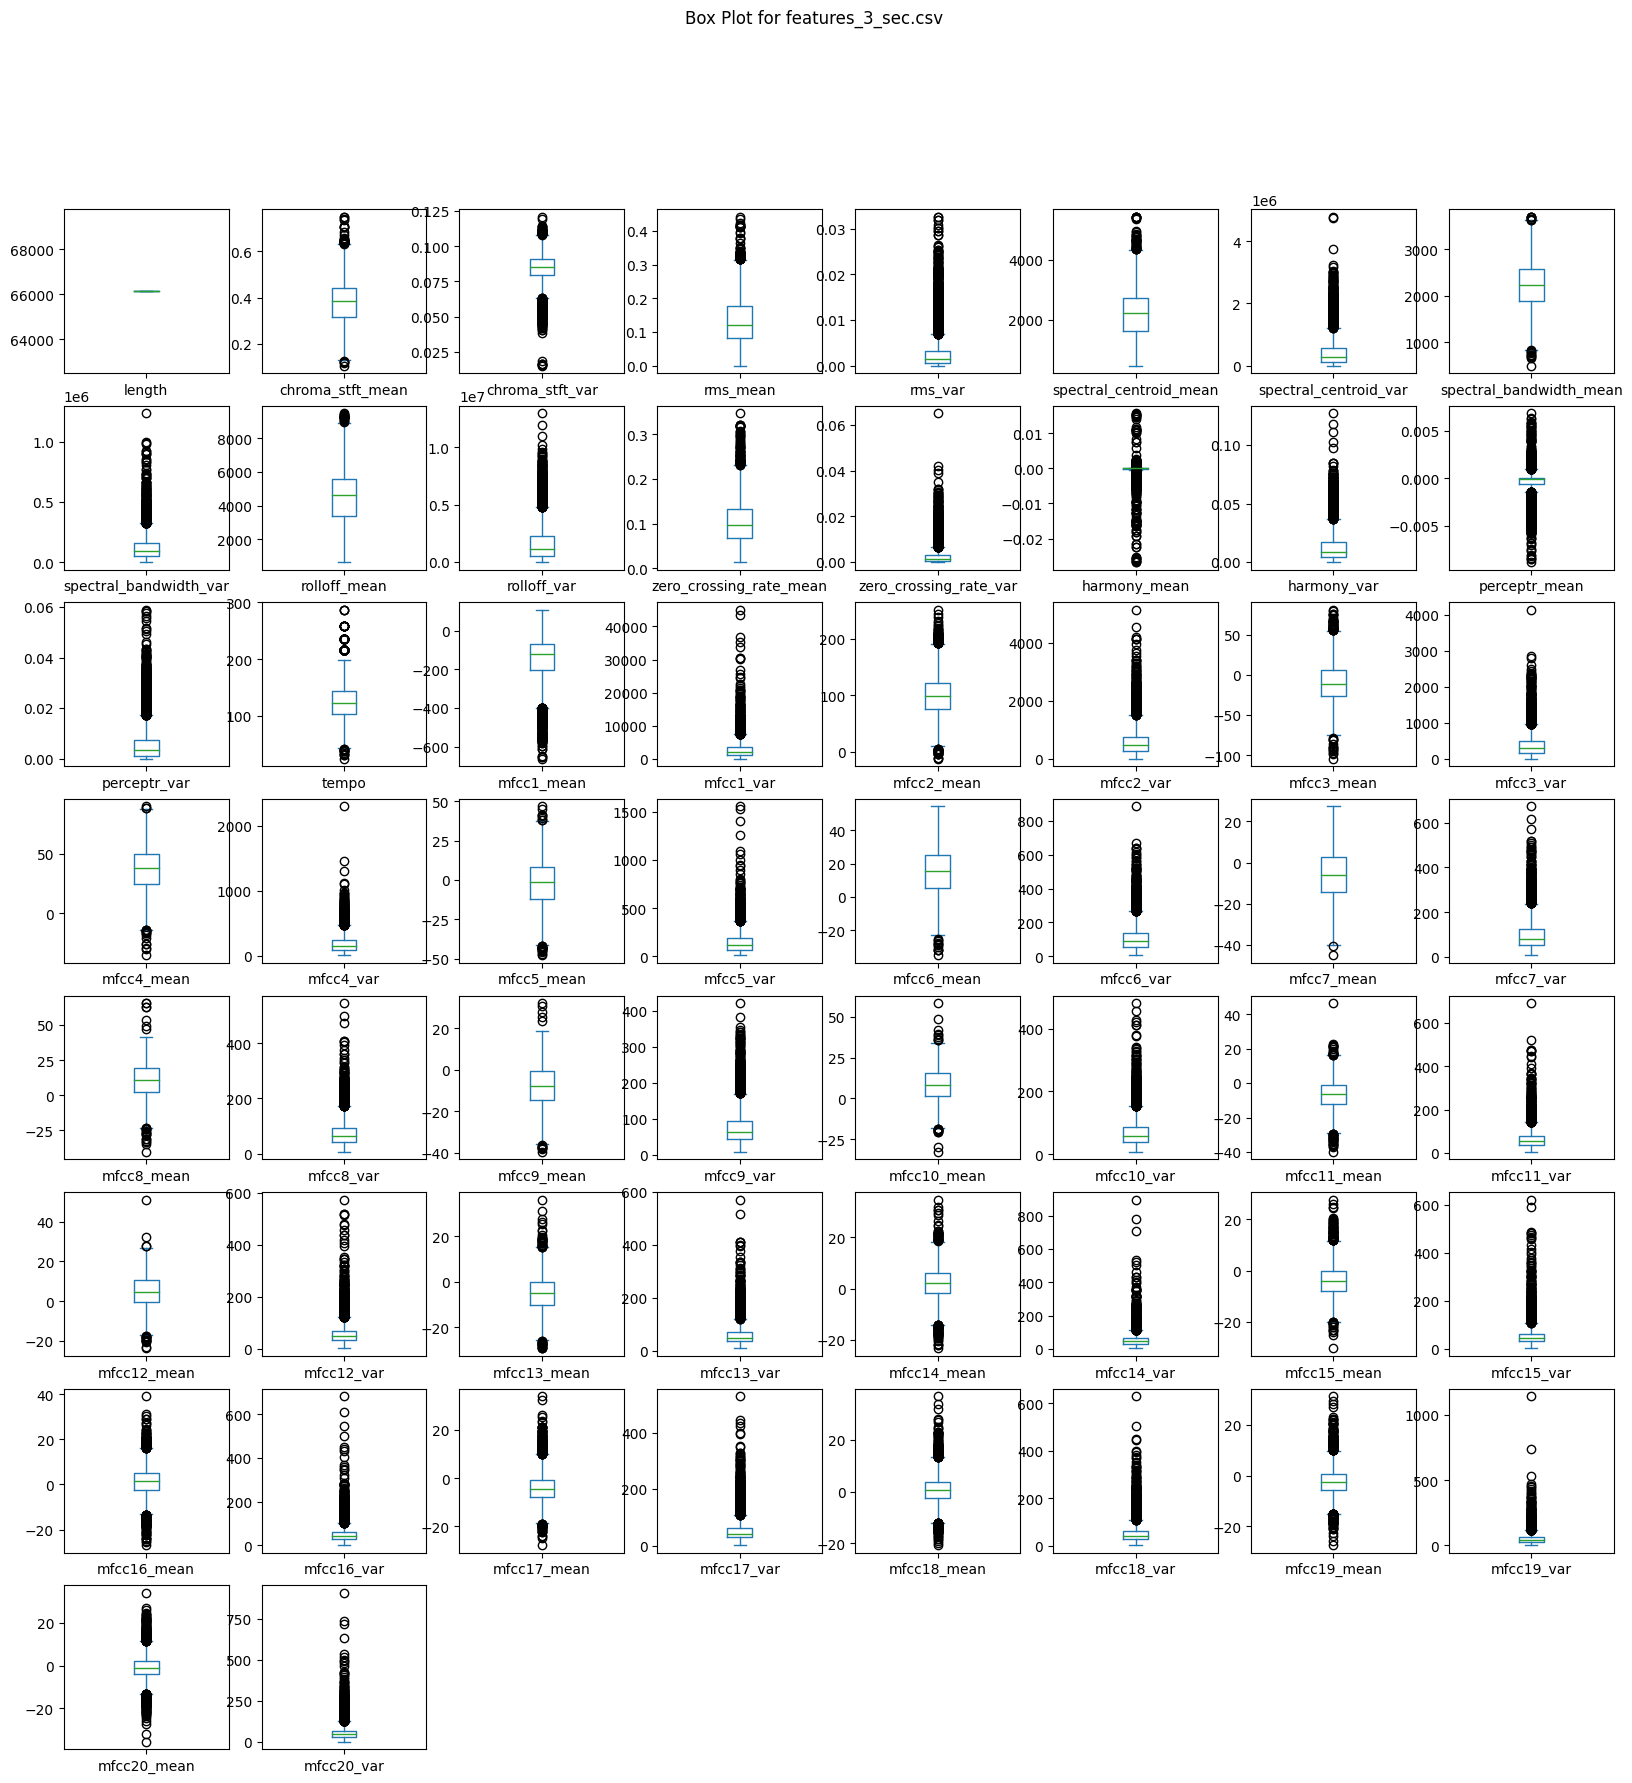

In [ ]:
#outlier detection boxplot
import matplotlib.pyplot as plt

df1.plot(kind='box', subplots=True, layout=(8, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box Plot for features_30_sec.csv')
plt.show()

df2.plot(kind='box', subplots=True, layout=(8, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box Plot for features_3_sec.csv')
plt.show()


Despite being a very brief exploratory data analysis, the results indicate that among both csv files, we are working with very consistent data.

We have 58 features of information about our music genres each with unique values. We have no null values, no repeating values, and no outstanding outliers.



```
# This is formatted as code
```

## Model Selection ##


**In this section we begin our machine learning process by looking for which type of model outputs a higher accuracy.**

We are specifically interested in comparing **image classification**  with **tabular data classification** of the dataset as well as the differences in accuracy when we use the **30 second version** of the files verus the **3 second version of the files split into 10 parts**.

USING A CNN FOR IMAGE CLASSIFICATION

In [ ]:

# Define the directory where images are stored
data_dir = '/content/gtzan-dataset-music-genre-classification/Data/images_original'

# Create ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'ImageDataGenerator' is not defined

# CNN MODEL

RUNTIME= 22min

In [ ]:

# Define the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen
)




Epoch 1/20
100/100 [==============================] - 55s 533ms/step - loss: 2.3922 - accuracy: 0.1163 - val_loss: 2.2835 - val_accuracy: 0.1759
Epoch 2/20
100/100 [==============================] - 56s 556ms/step - loss: 2.1603 - accuracy: 0.2025 - val_loss: 1.9691 - val_accuracy: 0.2915
Epoch 3/20
100/100 [==============================] - 52s 522ms/step - loss: 1.8288 - accuracy: 0.3575 - val_loss: 1.7933 - val_accuracy: 0.3568
Epoch 4/20
100/100 [==============================] - 52s 519ms/step - loss: 1.5730 - accuracy: 0.4225 - val_loss: 1.5359 - val_accuracy: 0.4472
Epoch 5/20
100/100 [==============================] - 60s 598ms/step - loss: 1.3988 - accuracy: 0.5125 - val_loss: 1.5950 - val_accuracy: 0.4372
Epoch 6/20
100/100 [==============================] - 53s 530ms/step - loss: 1.2685 - accuracy: 0.5537 - val_loss: 1.5682 - val_accuracy: 0.4472
Epoch 7/20
100/100 [==============================] - 56s 562ms/step - loss: 1.1566 - accuracy: 0.5775 - val_loss: 1.6005 - val_ac

After running this CNN model, we found that although the model is structurally sound, the model appears to be overfitting to the training data as evidenced by the increasing validation loss and plateauing validation accuracy. This suggests the model is too complex for the given dataset. It is capturing noise rather than general patterns.

To address this, increasing regularization through higher dropout rates and adding L2 regularization might effective. Implementing data augmentation might also provide more diverse training examples and aid the generalization. Additionally, using early stopping and a learning rate scheduler can prevent excessive training and fine-tune learning dynamics. Simplifying the model by reducing the number of layers or filters may also help in balancing model complexity with dataset size.

However, since we are just looking for which model to use, we will only adjust the model complexity if we chose to work with this CNN model.

# MULTI INPUT CNN


We expected the CNN model to be the best option for our genre classification model, but like mentioned above, we found that the model was overfitting to the training data and not generalizing well to validation or test data.


Before adjusting the model complexity we decided to run through some other model options



In [ ]:

# Load the CSV file
df = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
df = df.drop(554)  # Note that Python uses zero-based indexing, so the 554th row corresponds to index 553 (Thre is a missing value in this raw)


# Extract relevant features
X_numerical = df[['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
                  'rolloff_mean', 'zero_crossing_rate_mean', 'tempo']].values
y = df['label'].values



In [ ]:

# Define the base directory containing the original images
base_image_dir = '/content/gtzan-dataset-music-genre-classification/Data/images_original'

# List to store image arrays
X_images = []

# Load images
for genre, filename in zip(df['label'], df['filename']):
    # Remove the extension and dot from the filename
    image_name = filename.replace('.wav', '').replace('.', '')
    image_path = os.path.join(base_image_dir, genre, f"{image_name}.png")

    try:
        # Load the image and convert it to array
        img = load_img(image_path, target_size=(128, 128))  # adjust target size as needed
        img_array = img_to_array(img)
        X_images.append(img_array)
    except FileNotFoundError:
        print(f"File not found: {image_path}. Skipping...")

# Convert the list of image arrays to numpy array
X_images = np.array(X_images)

# Check the shape of X_images
print("Shape of X_images:", X_images.shape)




Shape of X_images: (999, 128, 128, 3)


In [ ]:

# Normalize numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Split the data into train and test sets
X_train_images, X_test_images, X_train_numerical, X_test_numerical, y_train, y_test = train_test_split(
    X_images, X_numerical_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Define image input
image_input = Input(shape=(128, 128, 3), name='image_input')
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Define numerical input
numerical_input = Input(shape=(X_train_numerical.shape[1],), name='numerical_input')

# Combine image and numerical inputs
combined = concatenate([x, numerical_input])

# Add dense layers
x = Dense(128, activation='relu')(combined)
num_classes = 10
output = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create model
model = Model(inputs=[image_input, numerical_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels for training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the model with encoded labels
model.fit([X_train_images, X_train_numerical], y_train_encoded, epochs=6, batch_size=18, validation_split=0.2)

# Transform labels for test data (use only transform to avoid data leakage)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model with encoded labels
loss, accuracy = model.evaluate([X_test_images, X_test_numerical], y_test_encoded)
print('Test accuracy:', accuracy)


Epoch 1/6
36/36 [==============================] - 20s 528ms/step - loss: 1844.1324 - accuracy: 0.1534 - val_loss: 169.9914 - val_accuracy: 0.1063
Epoch 2/6
36/36 [==============================] - 18s 504ms/step - loss: 48.2799 - accuracy: 0.2833 - val_loss: 2.4177 - val_accuracy: 0.1250
Epoch 3/6
36/36 [==============================] - 19s 527ms/step - loss: 4.7818 - accuracy: 0.1095 - val_loss: 2.3062 - val_accuracy: 0.0938
Epoch 4/6
36/36 [==============================] - 20s 541ms/step - loss: 2.2904 - accuracy: 0.1002 - val_loss: 2.3065 - val_accuracy: 0.0938
Epoch 5/6
36/36 [==============================] - 19s 512ms/step - loss: 2.2894 - accuracy: 0.1002 - val_loss: 2.3063 - val_accuracy: 0.0938
Epoch 6/6
7/7 [==============================] - 1s 142ms/step - loss: 2.2938 - accuracy: 0.0950
Test accuracy: 0.0949999988079071


The multi-input CNN model's results indicate that it is not learning effectively. The initial loss is extremely high, and although there is a rapid decrease in loss during the first few epochs, it quickly plateaus, while the accuracy remains very low. The validation loss and accuracy show minimal improvement, suggesting poor generalization. Both training and validation accuracies are close to random guessing, indicating that the model is not learning meaningful features from the data.

Potential issues with this model might include an excessively high learning rate, an overly complex or unsuitable model architecture, data preprocessing problems, insufficient training duration, lack of regularization, improper weight initialization, and incorrect handling of multi-input data. Adjusting these aspects, such as reducing the learning rate, simplifying the model, ensuring proper data normalization, increasing training epochs with early stopping, and adding regularization, could help improve the model's performance.

But again, we will experiment with some other models before investing time into adjusting this one.

# MODEL WITH DENSE Neural Network

runtime = 15 min


In [ ]:
# Define the Dense Neural Network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the image input
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the number of units according to your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_gen,
    epochs=20,
    batch_size=32,
    validation_data=val_gen
)





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               12583168  
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 12624970 (48.16 MB)
Trainable params: 12624970 (48.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1

The results from our dense neural network model indicate that it is not a very effective choice. Despite an initial decrease in loss and a gradual increase in accuracy, the validation accuracy remains low, and the validation loss does not show consistent improvement, often increasing in later epochs. This suggests that the model is overfitting to the training data, again capturing noise rather than generalizable patterns.

Furthermore, the architecture might be too simple to capture the complex features in the audio data, as it only consists of dense (fully connected) layers without any convolutional layers that are typically effective for image-like data. Additionally, the model may not be appropriately regularized, leading to overfitting. Increasing the complexity of the model by adding convolutional layers, implementing data augmentation, and enhancing regularization techniques such as dropout and early stopping could help in improving our model's generalization performance, but we will hold back on making those changes for now.

#RANDOM FOREST MODEL

After running through a variety of machine learning models (as described above), we decided that the Random Forest Model that used the 3 second .wav files was our best choice.

In the section below we will show the details for how we built the model.

It includes Data preprocessing, Feature Extraction, and Model training steps. Along with the Hyperparameter tuning, validation, and performance evaluation.

One of the bigger challenges here was figuring out how to extract the features of the music in splitting every music in 3s .wav files. This allow to have better result than simply extract the features on the entire music (30s).




```



FUNCTION TO SPLIT THE ORIGINAL DATA (30S .WAV FILES) IN 3S .WAV FILES

In [16]:
# Function to split audio files into 3-second segments
def split_audio_file(file_path, output_dir, segment_length=3000):
    try:
        audio = AudioSegment.from_file(file_path)
        file_name = Path(file_path).stem  # Get the filename without extension
        for i, start in enumerate(range(0, len(audio), segment_length)):
            segment = audio[start:start + segment_length]
            segment.export(os.path.join(output_dir, f"{file_name}_{i}.wav"), format="wav")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")



CREATION OF A DIRECTORY FOR THE SPLITED DATA

In [17]:
# Define root directory and subfolder names

root_dir = '/content/gtzan-dataset-music-genre-classification/Split_data_3s'
genre_original_dir = os.path.join(root_dir, 'genre_original')
#genre_dir = os.path.join(genre_original_dir, 'genre')

# Create directories if they don't exist
os.makedirs(genre_original_dir, exist_ok=True)

# List of genre names (example genres)
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

# Create subdirectories for each genre
for genre in genres:
    genre_path = os.path.join(genre_original_dir, genre)
    os.makedirs(genre_path, exist_ok=True)
    print(f"Created directory: {genre_path}")

print("Directory structure created successfully.")


Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/blues
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/classical
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/country
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/disco
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/hiphop
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/jazz
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/metal
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/pop
Created directory: /content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original/reggae
Created directory: /content/gtzan-dataset-music-genre-class

In [18]:
# Define the input and output directories
input_root_dir = '/content/gtzan-dataset-music-genre-classification/Data/genres_original'
output_root_dir = '/content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original'

genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

# Process all genres
genres = os.listdir(input_root_dir)
for genre in genres:
    genre_dir = os.path.join(input_root_dir, genre)
    output_genre_dir = os.path.join(output_root_dir, genre)
    os.makedirs(output_genre_dir, exist_ok=True)

    # Process each file in the genre directory
    for file_name in os.listdir(genre_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(genre_dir, file_name)
            split_audio_file(file_path, output_genre_dir)

    print(f"Processed genre: {genre}")

print("All files have been split and moved successfully.")


Processed genre: hiphop
Processed genre: disco
Processed genre: blues
Processed genre: country
Processed genre: pop
Processed genre: reggae
Processed genre: metal
Processed genre: rock
Error processing /content/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-li

FUNCTION TO EXTRACT THE FEATURES FROM A .WAV FILE

In [19]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, duration=30)

    # Extract features
    features = {
        'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'chroma_stft_std': np.std(librosa.feature.chroma_stft(y=y, sr=sr)),
        'rmse_mean': np.mean(librosa.feature.rms(y=y)),
        'rmse_std': np.std(librosa.feature.rms(y=y)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_centroid_std': np.std(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_bandwidth_std': np.std(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'rolloff_std': np.std(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'zero_crossing_rate_std': np.std(librosa.feature.zero_crossing_rate(y)),
    }

    # Extract MFCCs and their mean and standard deviation
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
        features[f'mfcc{i}_std'] = np.std(mfccs[i-1])

    return features

EXTRACTION OF THE FEATURES IN A CSV FILE (runtime=30min)

In [ ]:
# Define root directories
input_root_dir = '/content/gtzan-dataset-music-genre-classification/Split_data_3s/genre_original'
output_csv_file = '/content/gtzan-dataset-music-genre-classification/Split_data_3s/extracted_features.csv'

# List of genres (subfolders)

genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
# List to store all feature dictionaries
all_features = []

# Iterate through genres
for genre in genres:
    genre_dir = os.path.join(input_root_dir, genre)
    print(f"Processing genre: {genre}")

    files_processed = 0


    # Iterate through files in the genre directory
    for file_name in os.listdir(genre_dir):
        # Counter for files processed

        print(files_processed)

        if file_name.endswith('.wav'):
            file_path = os.path.join(genre_dir, file_name)

            # Extract features from the file
            features = extract_features(file_path)
            features['genre'] = genre  # Add genre label to features

            files_processed += 1

            # Append to the list of all features
            all_features.append(features)


# Convert list of dictionaries to a DataFrame
features_df = pd.DataFrame(all_features)

# Save DataFrame to CSV file
features_df.to_csv(output_csv_file, index=False)

print(f"Features extracted and saved to {output_csv_file}")

Processing genre: blues
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=286
  warnings.warn(


17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=264
  warnings.warn(


92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(


344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1587
  warnings.warn(


512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2028
  warnings.warn(


581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1808
  warnings.warn(


454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=485
  warnings.warn(


239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488


### RANDOM FOREST MODEL ###

SPLITTING THE DATA

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Split_data_3s/extracted_features.csv')
# Assume the last column is the label and there might be non-numeric columns like filenames
# Identify and exclude non-numeric columns
#non_numeric_columns = ['filename']  # Add other non-numeric columns if needed
X = data.drop(columns=['genre']).values  # Features
y = data['genre'].values   # Labels

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

RUN THE RANDOM FOREST MODEL

In [ ]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

# Save the trained model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

Test accuracy: 0.80


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simplified parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

# Save the trained model
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test accuracy: 0.81


More fine tuning

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [10]:
# Load the CSV file
data = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Split_data_3s/extracted_features.csv')

# Assume the last column is the label and there might be non-numeric columns like filenames
X = data.drop(columns=['genre']).values  # Features
y = data['genre'].values   # Labels

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


KeyError: "['genre'] not found in axis"

In [ ]:
# Initialize the Random Forest classifier with tuned parameters
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='auto',
                                min_samples_leaf=1, min_samples_split=2,
                                bootstrap=True, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_clf.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Test accuracy: {rf_accuracy:.2f}')

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(f'Random Forest Confusion Matrix:\n {rf_cm}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Test accuracy: 0.82
Random Forest Confusion Matrix:
 [[180   0  12   4   3  11   4   0   5   2]
 [  1 206   3   0   0   3   0   0   0   2]
 [ 15   3 167   1   3   6   0   1   6  11]
 [  2   3   5 172  10   4   5   4   7  15]
 [  3   0   7   7 171   3   6   6   5   4]
 [  7  12   4   3   2 182   1   1   0   2]
 [  1   0   0   0   5   0 179   0   1   7]
 [  0   0   4   4   6   2   0 179   4   3]
 [  6   3  11   7   9   4   2   4 166   2]
 [ 12   3  22  18   4   5  13   4   4 141]]


## Hyper Parameter tuning ##

For the Random Forest Classification model, hyperparameters such as the number of trees, maximum depth, and minimum samples split were optimized using cross-validation. The model had a high accuracy percentage of about 80% (we saw a range from 78%-80%).

We also tried to improve our test results by adding bagging classifiers or ada boost classifiers but these other forms of hyperparameter tuning were redudant and caused overfitting (in the case of the bagging classifier).


**Random Forest**, being an ensemble method itself, combined multiple decision trees to provide robust performance and reduce overfitting, making it a strong baseline. Using Random Forest as the base estimator for Bagging and AdaBoost  did not add significant value since these methods are generally more effective with simpler, weaker learners.

Additionally, the increased complexity and computational overhead of these methods did not translate to better performance due to diminishing returns. With these results we concluded that the current dataset and features have allowed the Random Forest model to reach near-optimal performance.

In [ ]:
# Initialize the Bagging Classifier
# 6 min run time and the accuracy decreases by 1%...
bagging_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predictions
bagging_y_pred = bagging_clf.predict(X_test)

# Accuracy
bagging_accuracy = accuracy_score(y_test, bagging_y_pred)
print(f'Bagging Classifier Test accuracy: {bagging_accuracy:.2f}')

# Confusion Matrix
bagging_cm = confusion_matrix(y_test, bagging_y_pred)
print(f'Bagging Classifier Confusion Matrix:\n {bagging_cm}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` 

Bagging Classifier Test accuracy: 0.80
Bagging Classifier Confusion Matrix:
 [[177   1   8   3   3  12   5   0   6   6]
 [  1 205   2   0   0   3   0   0   0   4]
 [ 15   3 153   3   3  15   2   2   6  11]
 [  2   3   6 164   9   4   5   7  11  16]
 [  4   1   5   7 160   4   5   9   9   8]
 [  4  14   4   1   2 185   1   0   1   2]
 [  1   0   0   0   6   0 181   0   1   4]
 [  0   0   5   4   5   2   0 178   5   3]
 [  6   3  10   7  10   6   2   6 162   2]
 [  7   4  25  21   3   6  15   4   6 135]]


In [ ]:
# Initialize the AdaBoost Classifier
#8 min time and the accuracy is the same, 82%
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=40, random_state=42)

# Train the model
adaboost_clf.fit(X_train, y_train)

# Predictions
adaboost_y_pred = adaboost_clf.predict(X_test)

# Accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
print(f'AdaBoost Classifier Test accuracy: {adaboost_accuracy:.2f}')

# Confusion Matrix
adaboost_cm = confusion_matrix(y_test, adaboost_y_pred)
print(f'AdaBoost Classifier Confusion Matrix:\n {adaboost_cm}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` 

AdaBoost Classifier Test accuracy: 0.82
AdaBoost Classifier Confusion Matrix:
 [[180   2  12   2   5   5   4   0   5   6]
 [  0 211   1   0   0   1   0   0   0   2]
 [  7   3 165   2   3  12   2   3   4  12]
 [  1   4   5 171  10   3   5  11   6  11]
 [  4   0   3   8 160   3   5  12   9   8]
 [  3  13   6   1   2 185   1   1   0   2]
 [  1   0   0   0   4   0 178   0   1   9]
 [  0   0   5   1   3   2   0 184   5   2]
 [  2   4   7   8   8   4   1   9 169   2]
 [  7   5  17  12   2   6  15   8   4 150]]


In [ ]:
# Perform Cross-validation

cv_scores_rf = cross_val_score(rf_clf, X, y_encoded, cv=5)
cv_scores_bagging = cross_val_score(bagging_clf, X, y_encoded, cv=5)
cv_scores_adaboost = cross_val_score(adaboost_clf, X, y_encoded, cv=5)

print(f'Cross-validation scores (Random Forest): {cv_scores_rf}')
print(f'Mean CV accuracy (Random Forest): {np.mean(cv_scores_rf):.2f}')

print(f'Cross-validation scores (Bagging): {cv_scores_bagging}')
print(f'Mean CV accuracy (Bagging): {np.mean(cv_scores_bagging):.2f}')

print(f'Cross-validation scores (AdaBoost): {cv_scores_adaboost}')
print(f'Mean CV accuracy (AdaBoost): {np.mean(cv_scores_adaboost):.2f}')


NameError: name 'cross_val_score' is not defined

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Random Forest
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf_clf, title, X, y_encoded, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


## Results ##
The performance of the Random Forest model was evaluated using several metrics, including accuracy, precision, recall, F1-score, and confusion matrix. Accuracy measures the proportion of correctly classified instances, while precision and recall were evaluated for each genre to assess the model's ability to predict each class accurately. The F1-score, which balances precision and recall, was also calculated. The confusion matrix provided a visualization of classification results and helped identify misclassifications. The results summary showed an overall accuracy of around 80% (we saw a range of 78-85%).

Precision, recall, and F1-score were detailed per genre, with higher performance observed in genres like classical and jazz, and lower performance in genres like reggae and rock. The confusion matrix revealed clear distinctions for most genres, though some overlap was noted in similar-sounding genres.

## Conclusions

The high accuracy of your Random Forest model can be attributed to several key factors: effective data cleaning, careful feature selection *(credits to the creators of the dataset)*, and thoughtful hyperparameter tuning.

Firstly, the quality of the data played a crucial role; well-cleaned data ensured that the model was trained on accurate and relevant information, reducing noise and potential errors.

Effective feature selection, such as extracting Mel-Frequency Cepstral Coefficients (MFCCs), chroma features, spectral contrast, and zero crossing rate, ensured the model captured the most important aspects of the audio data.

Additionally, the **Random Forest algorithm** itself is a powerful ensemble method that combined multiple decision trees to provide robust performance and reduce overfitting. This inherent strength is further enhanced by the randomness introduced in selecting subsets of data and features, allowing the model to capture a broad range of patterns. The use of systematic hyperparameter tuning ensured that the model was optimized for the specific dataset, further contributing to its high accuracy.

Lastly, the balanced nature of the dataset across genres likely aided in the model's ability to accurately classify each genre. These combined factors, including data quality, feature relevance, and the robust nature of the Random Forest algorithm, contributed to the model's impressive accuracy independed of other hyperparameter tuning.

Overall, it was interesting to see how the Random Forest model compared against other machine learning models. We think that given  its robustness to overfitting and its ability to handle a large number of features, the Random Forest Model was a good selection for classifying our music genre's accurately.


##Contributions: ##

The majority of work on the project was done together. We selected the dataset, discussed what we wanted to test, and how we would test create the machine learning model as a team.

Tristan led the Data preprocessing, feature extraction, and model training portion of the project, with some contributions from Inês.

Both Tristan and Inês worked on Hyperparameter tuning, validation, and performance evaluation. However, Tristan contributed significantly to the Hugging Face creation.

Inês led the documentation, analysis of results, and report writing with contributions from Tristan.


# Application of model: Hugging Face #

##Link to the hugginface##
**https://huggingface.co/spaces/Tristanbtd/PML_GTZAN_classification**

## TEST FOR APP.PY ###

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s et

In [ ]:
import gradio as gr
import pickle
import numpy as np
import librosa

# Load the trained Random Forest model
with open('random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, duration=30)

        # Extract features
        features = {
            'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            'chroma_stft_std': np.std(librosa.feature.chroma_stft(y=y, sr=sr)),
            'rmse_mean': np.mean(librosa.feature.rms(y=y)),
            'rmse_std': np.std(librosa.feature.rms(y=y)),
            'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_centroid_std': np.std(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'spectral_bandwidth_std': np.std(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'rolloff_std': np.std(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
            'zero_crossing_rate_std': np.std(librosa.feature.zero_crossing_rate(y)),
        }

        # Extract MFCCs and their mean and standard deviation
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
            features[f'mfcc{i}_std'] = np.std(mfccs[i-1])

        return features

    except Exception as e:
        print(f"Error in extract_features: {e}")
        return None

def classify_music(audio_file_path):
    try:
        # Extract features from the audio file
        features = extract_features(audio_file_path)
        if features is None:
            return "Error extracting features"

        # Predict using the loaded Random Forest model
        prediction = model.predict([list(features.values())])[0]  # Assuming model expects a list of feature values
        return str(prediction)  # Return as a string label

    except Exception as e:
        print(f"Error in classify_music: {e}")
        return "Error classifying music"

iface = gr.Interface(
    fn=classify_music,
    inputs=gr.Textbox(label="Enter file path of your .wav file"),
    outputs=gr.Label(num_top_classes=1)
)

iface.launch(share=True)


ModuleNotFoundError: No module named 'gradio'

In [ ]:
import gradio as gr
import pickle
import numpy as np
import librosa

# Load the trained Random Forest model
with open('random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

def extract_features(audio_data, sr):
    try:
        # Extract features
        features = {
            'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr)),
            'chroma_stft_std': np.std(librosa.feature.chroma_stft(y=audio_data, sr=sr)),
            'rmse_mean': np.mean(librosa.feature.rms(y=audio_data)),
            'rmse_std': np.std(librosa.feature.rms(y=audio_data)),
            'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sr)),
            'spectral_centroid_std': np.std(librosa.feature.spectral_centroid(y=audio_data, sr=sr)),
            'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)),
            'spectral_bandwidth_std': np.std(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)),
            'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sr)),
            'rolloff_std': np.std(librosa.feature.spectral_rolloff(y=audio_data, sr=sr)),
            'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=audio_data)),
            'zero_crossing_rate_std': np.std(librosa.feature.zero_crossing_rate(y=audio_data)),
        }

        # Extract MFCCs and their mean and standard deviation
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)
        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
            features[f'mfcc{i}_std'] = np.std(mfccs[i-1])

        return features

    except Exception as e:
        print(f"Error in extract_features: {e}")
        return None

genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

def classify_music(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file.name)

        # Extract features from the audio file
        features = extract_features(y, sr)
        if features is None:
            return "Error extracting features"

        # Predict using the loaded Random Forest model
        prediction = model.predict([list(features.values())])[0]  # Assuming model expects a list of feature values
        genre_name = genres[prediction]  # Get the genre name corresponding to the predicted label
        return genre_name  # Return the genre name as the output


    except Exception as e:
        print(f"Error in classify_music: {e}")
        return "Error classifying music"


iface = gr.Interface(
    fn=classify_music,
    inputs=gr.File(label="Upload your .wav file"),
    outputs=gr.Label(label='Predicted Genre')
)

iface.launch(share=True)
